In [40]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from matplotlib.backends.backend_pdf import PdfPages



df = pd.read_csv('./results.csv', parse_dates=['execution_assigned', 'execution_started', 'execution_finished'])
df['execution_time'] = (df.execution_finished - df.execution_started).astype('timedelta64[m]')

In [2]:
df.describe()

,sim_time,created,started,relayed,aborted,dropped,removed,delivered,delivery_prob,response_prob,...,buffertime_avg,buffertime_med,distance_avg,d_dist_avg,task_id,nodes,ttl,seed,buffer_size,execution_time
count,36000.0,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.000000,36000.0,...,36000.000000,36000.000000,36000.000000,35995.000000,36000.000000,36000.000000,36000.0,36000.000000,36000.000000,36000.000000
mean,21600.0,722.708333,55819.582500,55736.090111,65.768778,17592.521389,9180.888361,149.958944,0.223226,0.0,...,9256.396431,9254.457861,6187.096742,5560.795286,359.500000,516.666667,300.0,46805.980000,115.000000,145.927778
std,0.0,461.005633,76192.196749,76055.407937,129.373142,28337.964041,22530.354663,151.687618,0.174319,0.0,...,3518.288913,4253.188186,160.537841,534.852980,207.848783,318.420642,0.0,31417.097211,53.852396,927.733997
min,21600.0,238.000000,16.000000,16.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.0,...,3082.480700,2195.000000,5580.007289,648.289716,0.000000,100.000000,300.0,22.000000,50.000000,0.000000
25%,21600.0,404.000000,2831.750000,2829.750000,1.000000,926.000000,47.000000,38.000000,0.070800,0.0,...,6501.316400,6055.000000,6093.208913,5315.057486,179.750000,200.000000,300.0,15475.000000,75.000000,0.000000
50%,21600.0,594.000000,14500.000000,14485.500000,7.000000,5777.500000,244.000000,102.000000,0.156900,0.0,...,8123.635100,8032.000000,6185.618082,5642.873375,359.500000,500.000000,300.0,49338.500000,100.000000,4.000000
75%,21600.0,910.750000,87639.000000,87574.000000,64.000000,23344.000000,2418.250000,215.000000,0.384700,0.0,...,12505.588350,12605.000000,6277.301262,5875.706540,539.250000,800.000000,300.0,73906.000000,150.000000,17.000000
max,21600.0,1472.000000,338925.000000,338207.000000,764.000000,245722.000000,135627.000000,714.000000,0.626100,0.0,...,17128.431800,17968.000000,6745.301505,9216.871096,719.000000,1000.000000,300.0,98820.000000,200.000000,10515.000000


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'IBM_Plex_Mono_Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


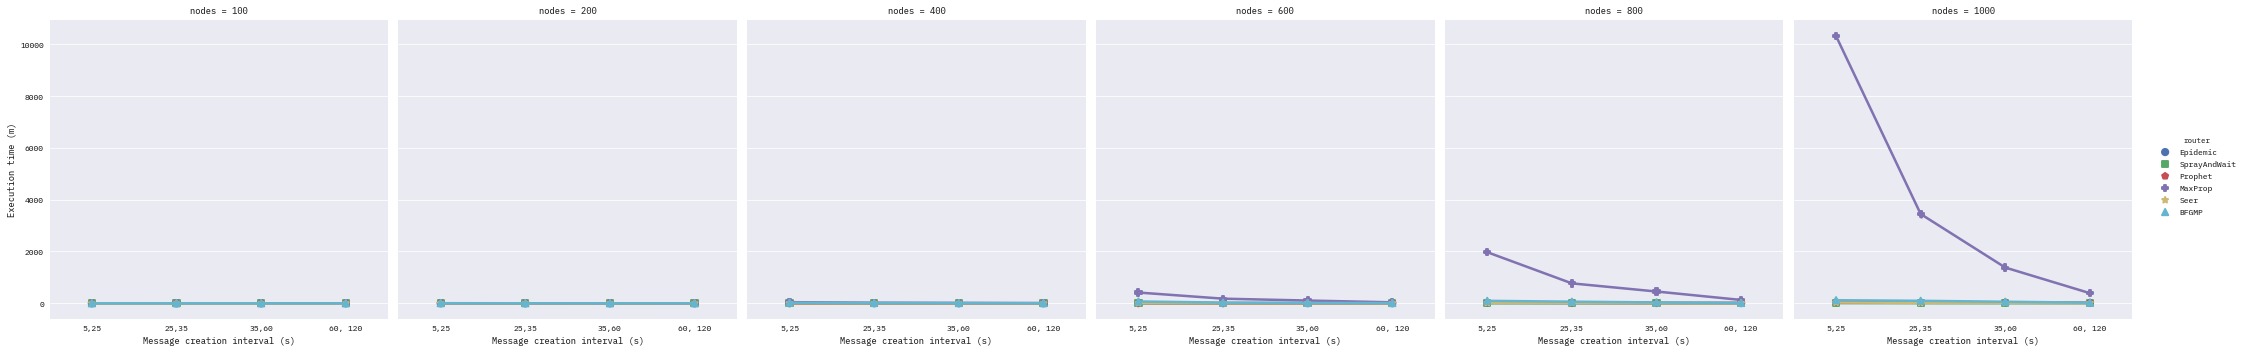

In [23]:
x_axis_order = ['5,25', '25,35', '35,60', '60, 120']
with sns.plotting_context('paper', rc={'font': 'IBM Plex Mono'}):    
    g=sns.factorplot(x='message_interval', y='execution_time', hue='router', data=df, col='nodes', order=x_axis_order, markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=5)
    g.set_axis_labels('Message creation interval (s)', 'Execution time (m)')
    g.savefig('execution_time.pdf')


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_pdf.py:1201: UserWarning: 'IBM_Plex_Mono_Medium.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


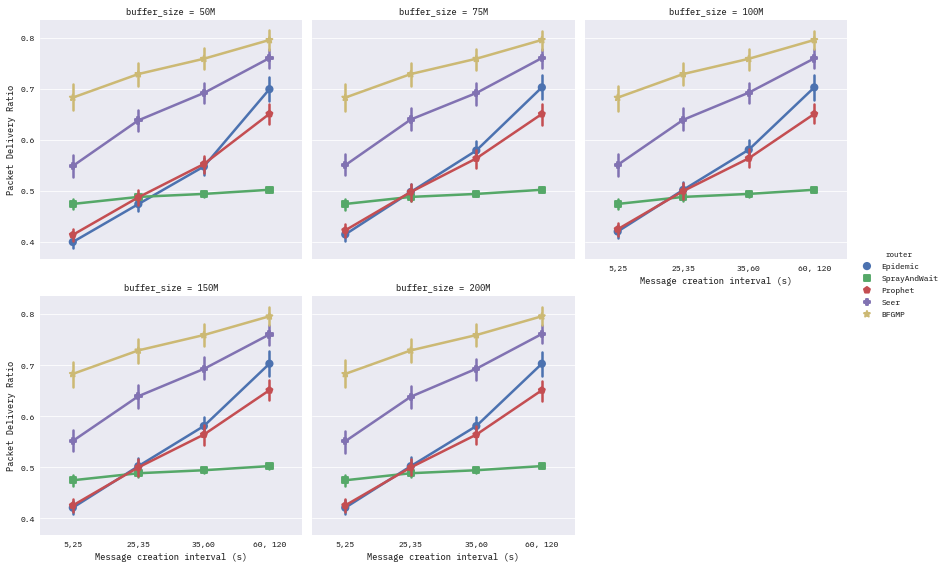

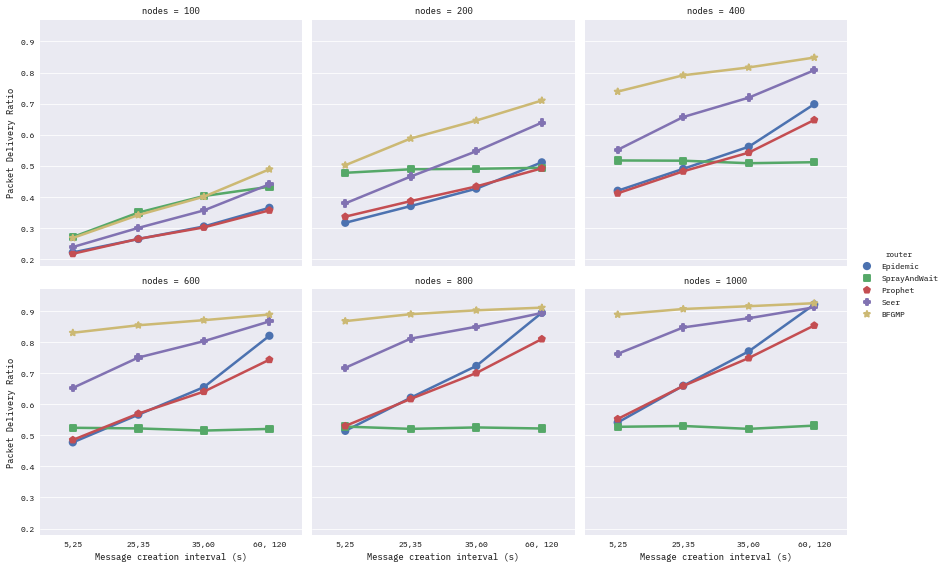

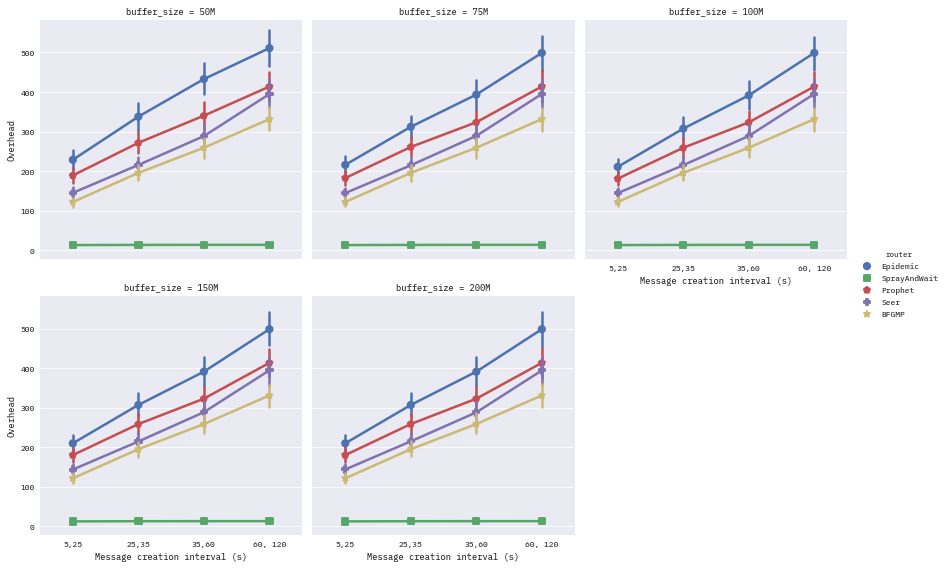

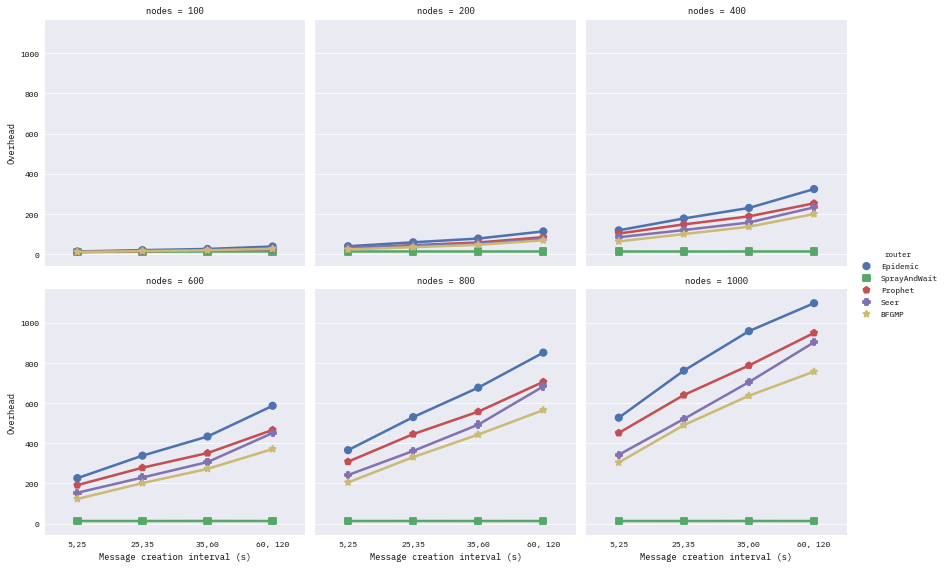

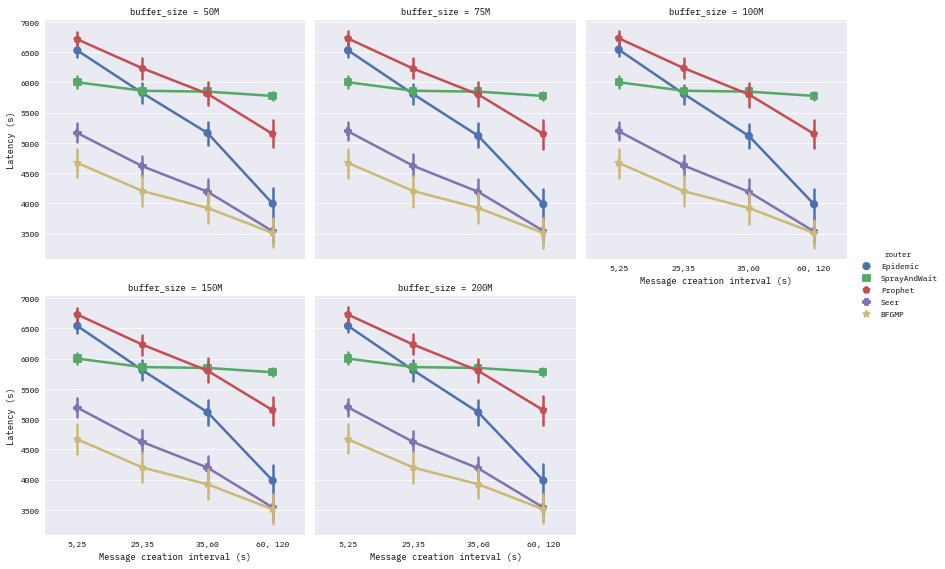

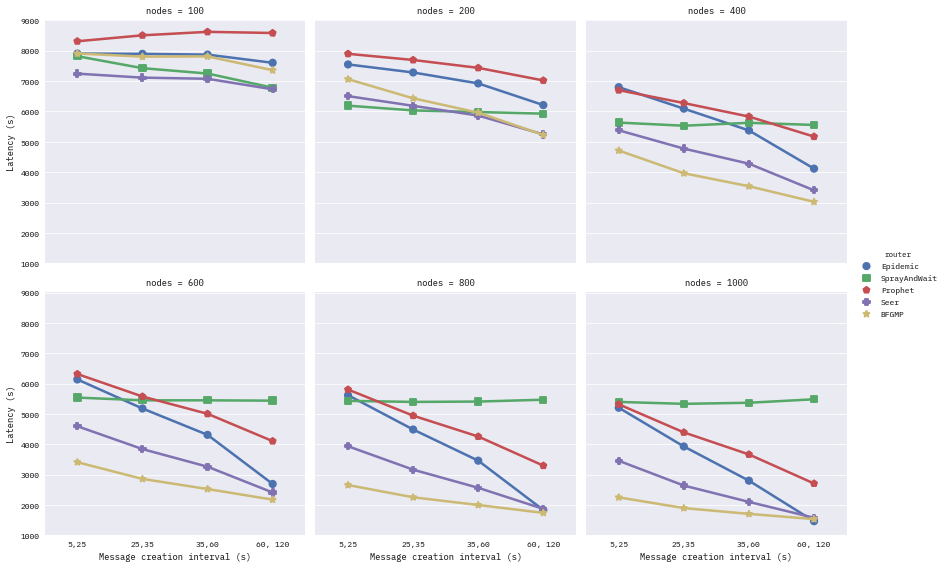

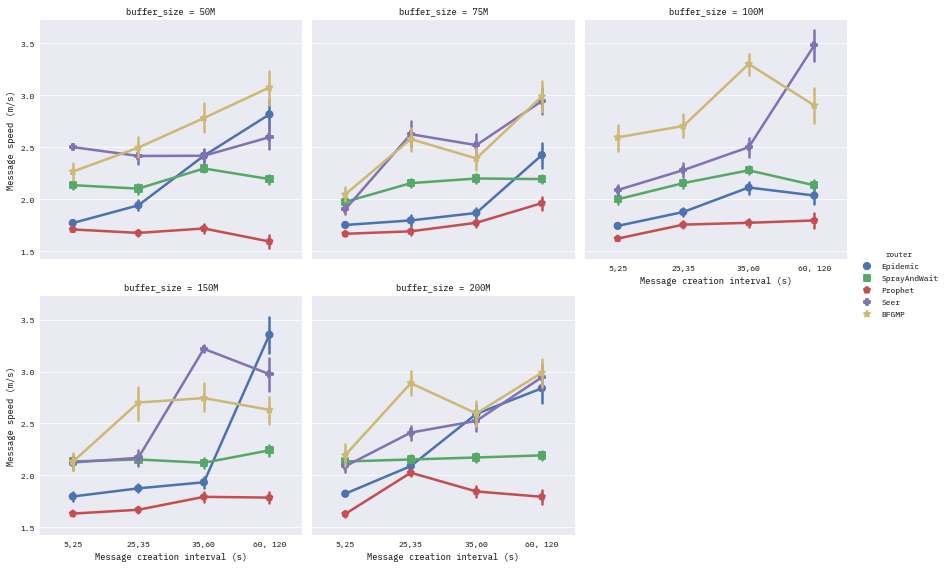

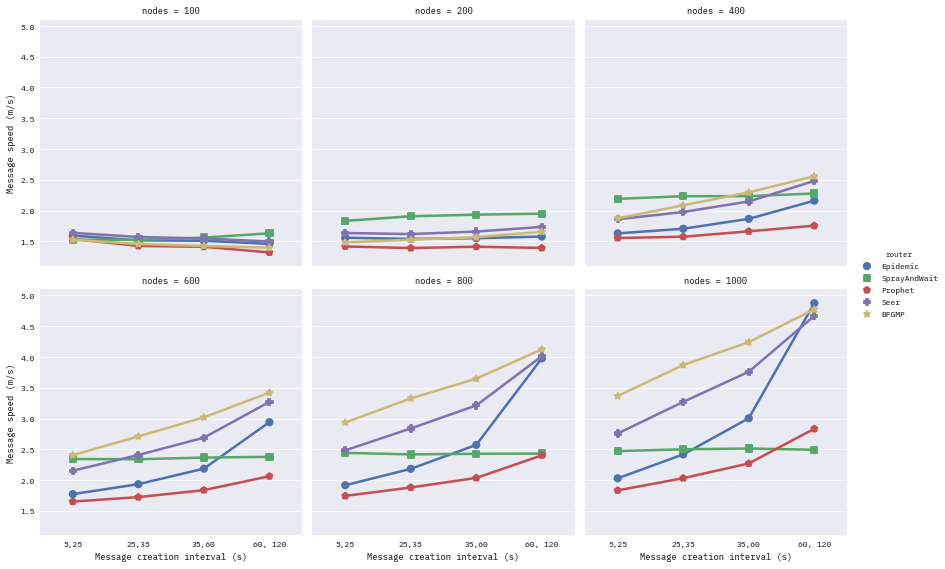

In [46]:
results = pd.read_csv('./results_speed.csv', parse_dates=['execution_assigned', 'execution_started', 'execution_finished'])

# Calculate the execution time in minutes
results['execution_time'] = (results.execution_finished - results.execution_started).astype('timedelta64[m]')

graph_size = 4

with sns.plotting_context('paper', rc={'font': 'sans-serif'}):
    with PdfPages('./metrics.pdf') as pdf:
        g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', 
                           data=results, order=x_axis_order,
                           col='buffer_size', col_wrap=3,  col_order=['50M', '75M', '100M', '150M', '200M'], 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Packet Delivery Ratio')
        pdf.savefig()
    
        g = sns.factorplot(x='message_interval', y='delivery_prob', hue='router', 
                           data=results, order=x_axis_order,
                           col='nodes', col_wrap=3, 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Packet Delivery Ratio')
        pdf.savefig()
    
        # Overhead
        g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', 
                           data=results, order=x_axis_order,
                           col='buffer_size', col_wrap=3,  col_order=['50M', '75M', '100M', '150M', '200M'], 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Overhead')
        pdf.savefig()
    
        g = sns.factorplot(x='message_interval', y='overhead_ratio', hue='router', 
                           data=results, order=x_axis_order,
                           col='nodes', col_wrap=3, 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Overhead')
        pdf.savefig()
    
        # End to end delay
        g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', 
                           data=results, order=x_axis_order,
                           col='buffer_size', col_wrap=3,  col_order=['50M', '75M', '100M', '150M', '200M'], 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
        pdf.savefig()
    
        g = sns.factorplot(x='message_interval', y='latency_avg', hue='router', 
                           data=results, order=x_axis_order,
                           col='nodes', col_wrap=3, 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Latency (s)')
        pdf.savefig()
    
        # Message speed
        g = sns.factorplot(x='message_interval', y='speed_avg', hue='router', 
                           data=results, order=x_axis_order,
                           col='buffer_size', col_wrap=3,  col_order=['50M', '75M', '100M', '150M', '200M'], 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Message speed (m/s)')
        pdf.savefig()
    
        g = sns.factorplot(x='message_interval', y='speed_avg', hue='router', 
                           data=results, order=x_axis_order,
                           col='nodes', col_wrap=3, 
                           markers=['o','s', 'p', 'P', '*', '^', 'v', '<', '>'], size=graph_size)
        g.set_axis_labels('Message creation interval (s)', 'Message speed (m/s)')
        pdf.savefig()
    
